<a href="https://colab.research.google.com/github/Shanu-Mathew/Tensorflow-Notes/blob/main/CNN_%26_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and CV

In [1]:
!pip install --upgrade keras

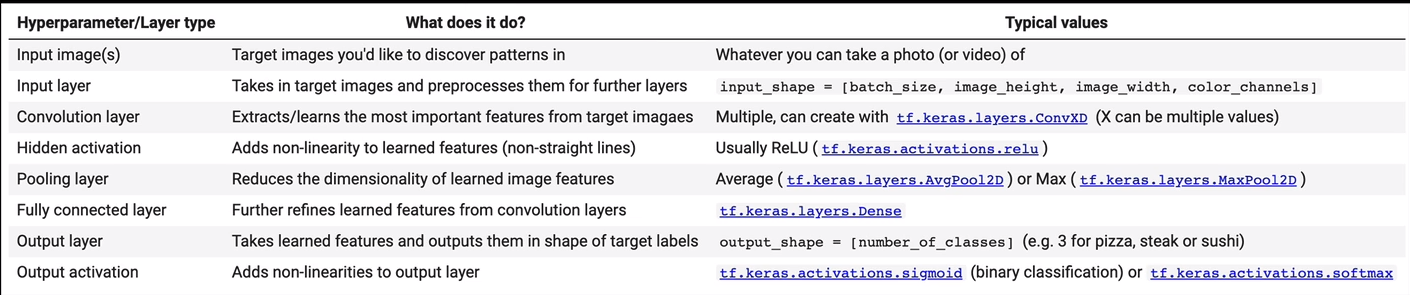

## Data Ingestion

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-09-11 18:14:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 173.194.218.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   198MB/s    in 0.5s    

2023-09-11 18:14:48 (198 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



##Inspect the Data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [7]:
# Another way
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) #Creates a list of class_names from the subdir
print(class_names)

['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #Setup the target dir
  target_folder=target_dir+target_class
  print(target_folder)
  print(os.listdir(target_folder))
  #Get a random image path
  random_image=random.sample(os.listdir(target_folder),1)

  #Read in the image and plot
  img=mpimg.imread(target_folder+'/'+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape:{img.shape}")
  return img

pizza_steak/train/pizza
['1761451.jpg', '3767723.jpg', '2098014.jpg', '1054420.jpg', '2126352.jpg', '38349.jpg', '1370319.jpg', '1069629.jpg', '1426781.jpg', '765799.jpg', '608085.jpg', '2556273.jpg', '3082068.jpg', '452989.jpg', '759873.jpg', '513754.jpg', '1011404.jpg', '1165451.jpg', '2881282.jpg', '3798959.jpg', '3023774.jpg', '741883.jpg', '2775763.jpg', '2035248.jpg', '1552253.jpg', '2800325.jpg', '2707814.jpg', '2481333.jpg', '959901.jpg', '3864383.jpg', '269396.jpg', '2742044.jpg', '2501961.jpg', '3342039.jpg', '358178.jpg', '1040878.jpg', '3871666.jpg', '3745884.jpg', '44449.jpg', '2990023.jpg', '3326344.jpg', '2852301.jpg', '382829.jpg', '3039549.jpg', '352051.jpg', '1044789.jpg', '823104.jpg', '2693334.jpg', '2215531.jpg', '3766053.jpg', '1914969.jpg', '1097980.jpg', '27963.jpg', '138855.jpg', '568383.jpg', '2769168.jpg', '2161241.jpg', '403431.jpg', '2104569.jpg', '2902766.jpg', '2674351.jpg', '3478964.jpg', '857888.jpg', '721383.jpg', '2587918.jpg', '1687681.jpg', '2235981

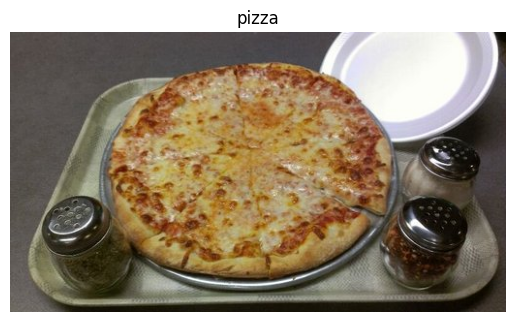

In [10]:
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

## End to End Example Model
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our image
* Compile our CNN
* Fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
from keras.layers.serialization import activation
#Model Creation

# Set random seed
tf.random.set_seed(42)

#Preprocess data (Normalize Image)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup path to the directories
train_dir="/content//pizza_steak/train"
test_dir="pizza_steak/test"

#Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#Build a CNN MOdel (SAme as the Tiny VGG on the CNN explainer website)
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                            activation="relu",
                            input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


# Compile the model
model_1.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

 # Fit the model
history_1=model_1.fit(train_data,epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

ModuleNotFoundError: ignored

Use GPU as Hardware Accelerator to speed up the training process of images

Go through the CNN Explainer website

In [ ]:
model_1.summary()

## Binary Classification

1. Visualise the data
2. Preprocess the data
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the Model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### Visualise Data

pizza_steak/train/steak
['3830872.jpg', '2599817.jpg', '2365287.jpg', '1335556.jpg', '1618011.jpg', '3528458.jpg', '3812039.jpg', '2603058.jpg', '3020591.jpg', '256592.jpg', '590142.jpg', '987732.jpg', '1446401.jpg', '2495903.jpg', '477486.jpg', '3142674.jpg', '2912290.jpg', '1476404.jpg', '3095301.jpg', '405173.jpg', '922752.jpg', '3140083.jpg', '317206.jpg', '179293.jpg', '3868959.jpg', '2788312.jpg', '401094.jpg', '3382936.jpg', '183995.jpg', '2032669.jpg', '234704.jpg', '3465327.jpg', '56409.jpg', '1053665.jpg', '2374582.jpg', '250978.jpg', '368162.jpg', '2532239.jpg', '1098844.jpg', '2090493.jpg', '2403776.jpg', '2223787.jpg', '3613455.jpg', '2020613.jpg', '676189.jpg', '2052542.jpg', '1530833.jpg', '227576.jpg', '146833.jpg', '1995252.jpg', '3047807.jpg', '285147.jpg', '2136662.jpg', '1822407.jpg', '2936477.jpg', '3524429.jpg', '2927833.jpg', '503589.jpg', '413325.jpg', '290850.jpg', '2193684.jpg', '465494.jpg', '2017387.jpg', '3364420.jpg', '3700079.jpg', '252858.jpg', '3011642.

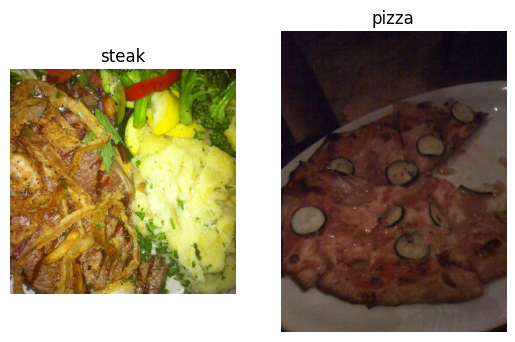

In [18]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img=view_random_image("pizza_steak/train/","pizza")

### Preprocess the Data

In [17]:
# Define dir dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

Next step is to turn the data into **Batches**

A batch is a small subset of data.
It is done because:
1. 10k images ot more cannot fit into the memory of your processor.
2. Trying to learn the patterns in 10k images in one hit could result in the model not being able to learn very well.

In [19]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1/255)
test_datagen= ImageDataGenerator(rescale=1/255)

In [20]:
train_data=train_datagen.flow_from_directory (directory=train_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)
test_data= test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
# Get a sample of a train data batch
images,labels=train_data.next()
len(images), len(labels)

(32, 32)

In [22]:
# Number of batches
len(train_data)

47

In [23]:
# Get the first two images
images[:2],images[0].shape

(array([[[[0.07450981, 0.01568628, 0.        ],
          [0.0627451 , 0.01176471, 0.        ],
          [0.07058824, 0.01568628, 0.00392157],
          ...,
          [0.04313726, 0.02352941, 0.01176471],
          [0.01568628, 0.01176471, 0.        ],
          [0.00392157, 0.00784314, 0.        ]],
 
         [[0.0627451 , 0.02745098, 0.        ],
          [0.05490196, 0.01960784, 0.        ],
          [0.05882353, 0.02352941, 0.00392157],
          ...,
          [0.03921569, 0.01960784, 0.00784314],
          [0.01960784, 0.00392157, 0.        ],
          [0.01568628, 0.        , 0.        ]],
 
         [[0.04313726, 0.03137255, 0.        ],
          [0.03529412, 0.02352941, 0.        ],
          [0.03921569, 0.02745098, 0.        ],
          ...,
          [0.04705883, 0.01568628, 0.00784314],
          [0.03921569, 0.00784314, 0.        ],
          [0.03529412, 0.01568628, 0.00392157]],
 
         ...,
 
         [[0.34509805, 0.3647059 , 0.34901962],
          [0.34901

In [24]:
# View the first batch of labels
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
      dtype=float32)

### Buliding a CNN Model
A baseline is relatively simple model or existing result that you setup when beginning experimenting, you try ot beat the baseline.

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Activation
from tensorflow.keras import Sequential

In [26]:
#Baseline Model
model_4=Sequential([
    Conv2D(filters=10, # filters is the number of the sliding window
           kernel_size=3, # The size of the sliding window going across the input
           strides=1, # The size of the step the sliding window takes across the step
           padding="valid",# if "same" output shape = input shape, else if "valid" output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 176ms/step - loss: 1.7217 - accuracy: 0.6373 - val_loss: 0.6052 - val_accuracy: 0.6560
Epoch 2/5
47/47 [==============================] - 6s 126ms/step - loss: 0.4466 - accuracy: 0.7987 - val_loss: 0.4006 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 8s 163ms/step - loss: 0.3048 - accuracy: 0.8867 - val_loss: 0.3916 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 7s 157ms/step - loss: 0.1388 - accuracy: 0.9607 - val_loss: 0.5393 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 7s 154ms/step - loss: 0.0541 - accuracy: 0.9893 - val_loss: 0.4302 - val_accuracy: 0.8200


### Evaluate our model


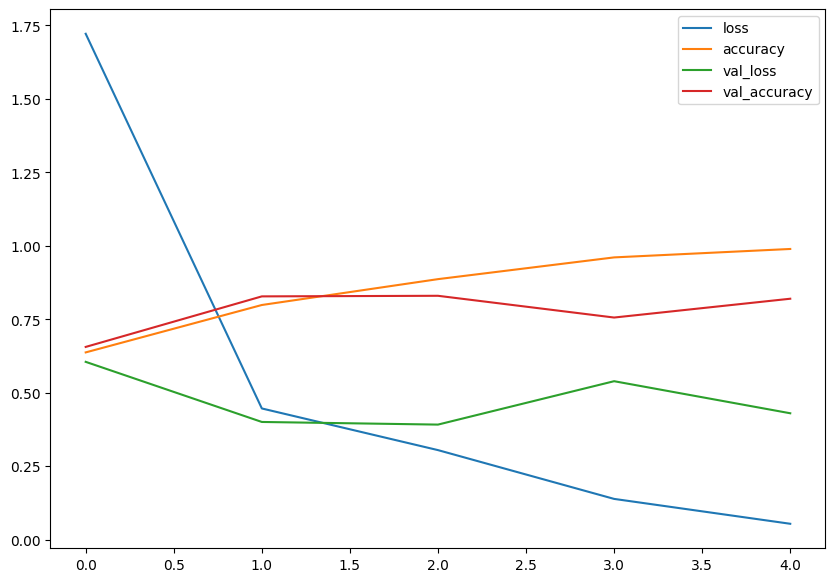

In [27]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [28]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss=history.history["loss"]
  val_loss= history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs= range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

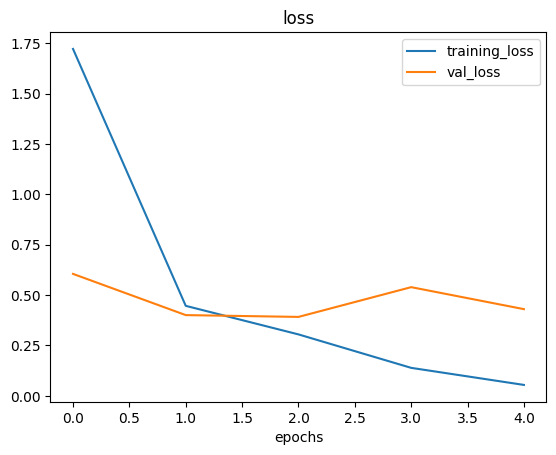

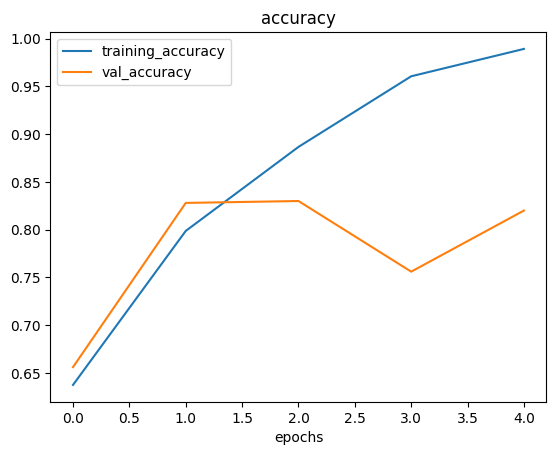

In [29]:
plot_loss_curves(history_4)

**Note:- If a model's validation loss starts to increase, it's likely that the model is overfitting the training dataset**

### Adjusting Model Parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting
* Increase the number of Conv Layers
* Increase the number of Conv filters
* Add another dense layer to the output of our flattened layer

Reduce Overfitting:
* Add Data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data.....


In [41]:
# New Model
model_5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
16/16 [==============================] - 6s 287ms/step - loss: 0.6926 - accuracy: 0.5060 - val_loss: 0.6559 - val_accuracy: 0.7620
Epoch 2/5
16/16 [==============================] - 3s 186ms/step - loss: 0.6247 - accuracy: 0.6600 - val_loss: 0.5366 - val_accuracy: 0.7580
Epoch 3/5
16/16 [==============================] - 4s 242ms/step - loss: 0.4794 - accuracy: 0.7900 - val_loss: 0.4079 - val_accuracy: 0.8160
Epoch 4/5
16/16 [==============================] - 4s 225ms/step - loss: 0.4052 - accuracy: 0.8140 - val_loss: 0.3475 - val_accuracy: 0.8520
Epoch 5/5
16/16 [==============================] - 3s 181ms/step - loss: 0.3481 - accuracy: 0.8400 - val_loss: 0.3355 - val_accuracy: 0.8600


In [42]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 10)       

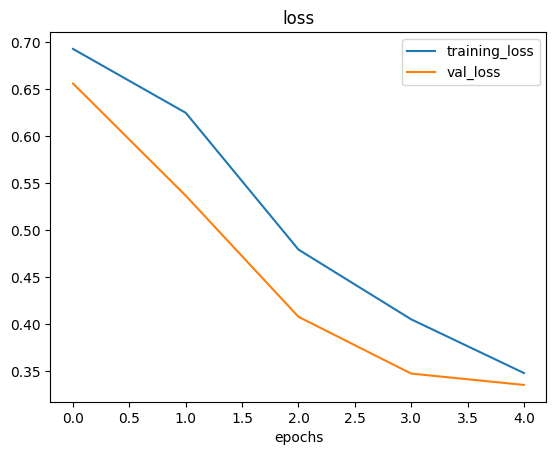

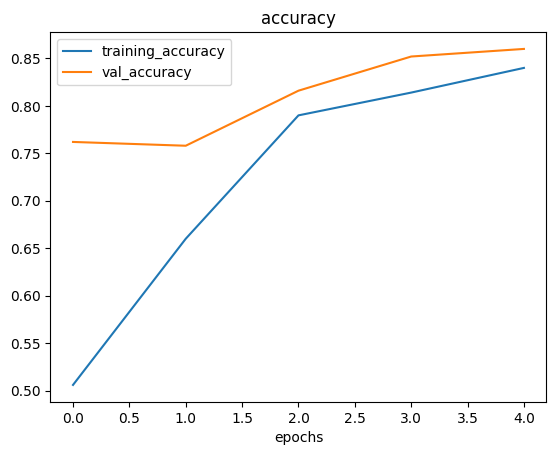

In [43]:
plot_loss_curves(history_5)

#### Creating Data Augmentation

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns hopefully.
Altering might mean adjusting the rotation of an image, flipping it or cropping it etc.

In [44]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, #How much you want to rotate an image
                                             shear_range=0.2, # How much you want to shear
                                             zoom_range=0.2, #Zoom in randomly on the image
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)  #Do you want to flip or not ?
# Create ImageDataGenerator training instance without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator training instance with data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [49]:
# Visualize Data Augmentation
print("Augmented Training Data:")
train_data_augmented =train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle=False)
# Create non-augmented train data batches
print("Non-augmented training data")
train_data= train_datagen.flow_from_directory(train_dir,
                                                        target_size=(224,224),
                                                        batch_size=32,
                                                        class_mode="binary",
                                                        shuffle=False)

IMG_SIZE=(224,224)
#Create non-augmented test data batches
print('Non-augmented test data')
test_data= test_datagen.flow_from_directory(test_dir,
                                              target_size=IMG_SIZE,
                                              batch_size=32,
                                              class_mode="binary")

Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


**Note: Data augmentation is usually only performed on the training data.** Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [50]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels =train_data_augmented.next()

Showing Image Number:8


(-0.5, 223.5, 223.5, -0.5)

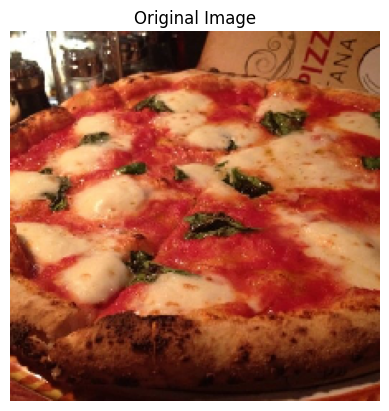

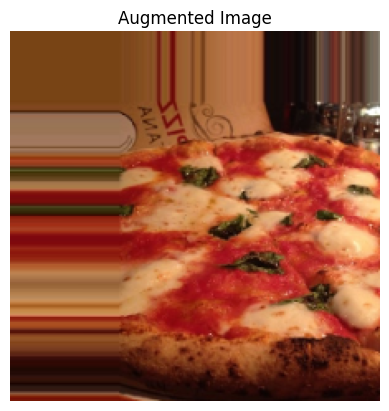

In [53]:
# Show original image and augmented image
import random
random_number= random.randint(0,32) # Our batch sizes are 32...
print(f"Showing Image Number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [55]:
# Create a model (same as model_5)

model_6= Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 550ms/step - loss: 0.7234 - accuracy: 0.3853 - val_loss: 0.6851 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6939 - accuracy: 0.5347 - val_loss: 0.6718 - val_accuracy: 0.5660
Epoch 3/5
47/47 [==============================] - 26s 554ms/step - loss: 0.7069 - accuracy: 0.6567 - val_loss: 0.6744 - val_accuracy: 0.5440
Epoch 4/5
47/47 [==============================] - 31s 673ms/step - loss: 0.6935 - accuracy: 0.5093 - val_loss: 0.6679 - val_accuracy: 0.6300
Epoch 5/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6865 - accuracy: 0.5687 - val_loss: 0.9148 - val_accuracy: 0.5000


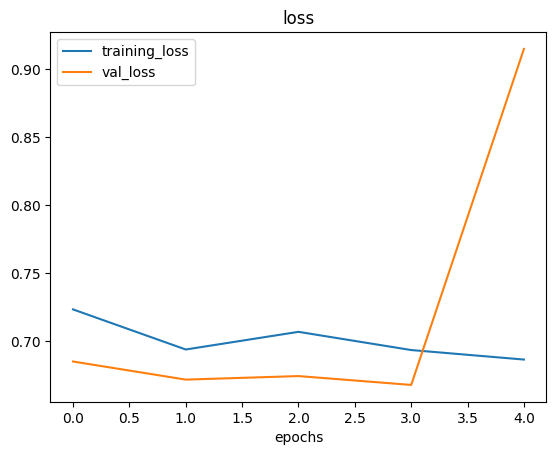

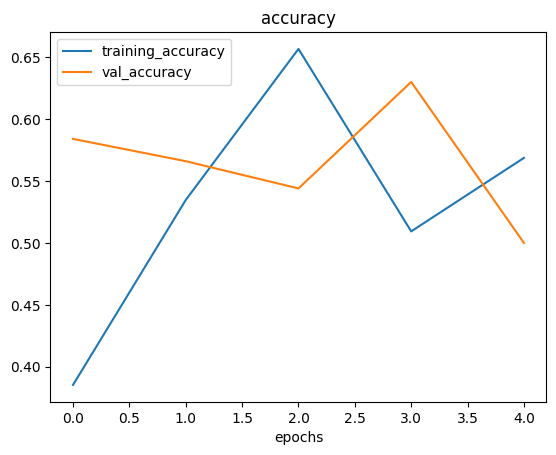

In [56]:
#Check Learning Curve
plot_loss_curves(history_6)

Shuffling the Augmented Data and Train another model on it.

In [ ]:
#Import data and augment Data
print("Augmented Training Data:")
train_data_augmented_shuffled =train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle=True)

In [58]:
#Create the model
model_7 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model
history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 33s 664ms/step - loss: 0.7172 - accuracy: 0.4487 - val_loss: 0.6834 - val_accuracy: 0.5620
Epoch 2/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6923 - accuracy: 0.5633 - val_loss: 0.6680 - val_accuracy: 0.6560
Epoch 3/5
47/47 [==============================] - 24s 520ms/step - loss: 0.6895 - accuracy: 0.5613 - val_loss: 0.6527 - val_accuracy: 0.6780
Epoch 4/5
47/47 [==============================] - 24s 522ms/step - loss: 0.6667 - accuracy: 0.6280 - val_loss: 0.6285 - val_accuracy: 0.5660
Epoch 5/5
47/47 [==============================] - 23s 488ms/step - loss: 0.6466 - accuracy: 0.6287 - val_loss: 0.5960 - val_accuracy: 0.6420


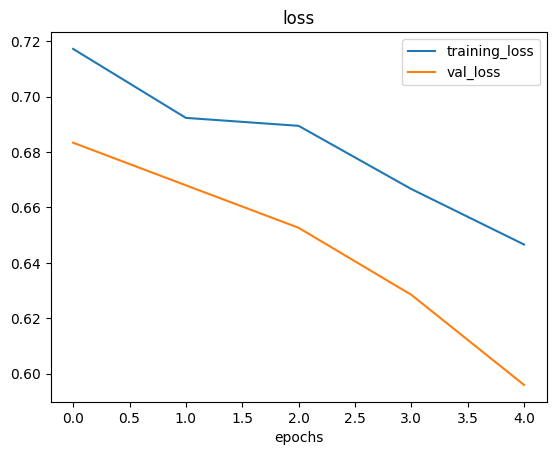

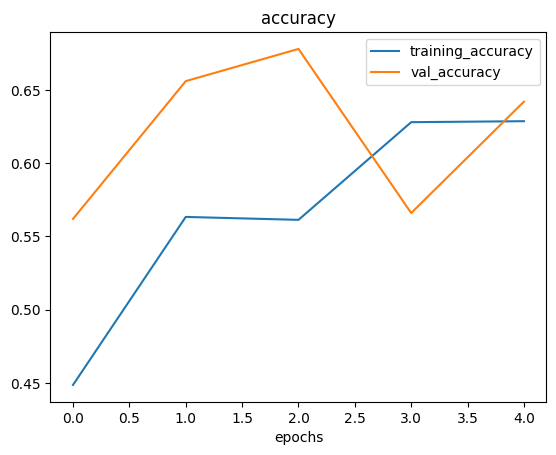

In [60]:
plot_loss_curves(history_7)

## Making a prediction with our Trained Model with our custom data


In [68]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-09-11 19:56:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-09-11 19:56:17 (26.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

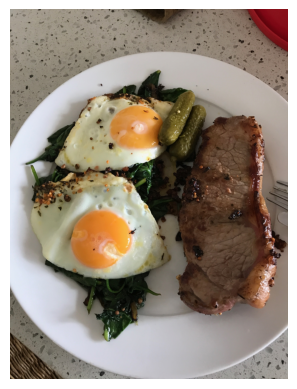

In [71]:
steak=mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [72]:
steak.shape

(4032, 3024, 3)